# Figures pour le papier

## Spectrogrammes

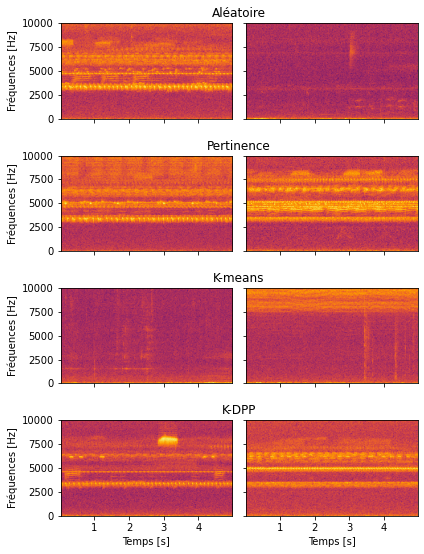

In [2]:
from affichageDonnees import displaySamplingsSpectrogram
from echantillonnages import sampling_random, sampling_pertinence, sampling_kmeans, sampling_dpp

nbSamples = 2
samplingNames = ["Aléatoire", "Pertinence", "K-means", "K-DPP"]
samplingFunctions = [sampling_random, sampling_pertinence, sampling_kmeans, sampling_dpp]
height = 2
width = 3
descriptorName = 'scalogramStat4'
J = 12
Q = 3
pertinenceFunction = 'inverse'
root = './soundDatabase'
cmap = 'inferno'
title = ""
labelFontSize = 10
labelFontWeight = 'normal'
subtitlesFontSize = 12
subtitlesFontWeight = 'normal'
titleFontSize = 13
titleFontWeight = 'semibold'


displaySamplingsSpectrogram(nbSamples, samplingNames, samplingFunctions, height, width, descriptorName, J, Q, pertinenceFunction, root, cmap, title, labelFontSize, labelFontWeight, subtitlesFontSize, subtitlesFontWeight, titleFontSize, titleFontWeight)